In [17]:
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [18]:

auth = tw.OAuthHandler("jwc6IYlv3HEfIzcRhu4K7GUT1", "AWD0d3aRKt3HHfAPe3oV8xnq2MIvL1zFlWX0Sa0Xm1g6hmjdZX")
auth.set_access_token("1335153296365875201-KGvNr9iJNqjITaz0lBL2STQfnMhqnT", "hpUawKvoOgKcDNzZ1ToDFrs4wbBWoFJveOintgGzrUx7e")


api = tw.API(auth)


In [32]:
hashtag = "#presidentialdebate"
query = tw.Cursor(api.search_tweets, q=hashtag).items(10000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020 - hosted by cwru &amp; ClevelandClinic\n🇺🇸#Debates2020 #COVID19 \nhttps://t.co/65GKfg68lP…', 'Timestamp': datetime.datetime(2022, 5, 5, 14, 37, 2, tzinfo=datetime.timezone.utc)}, {'Tweet': "RT @WSjp_insight: 1st US #PresidentialDebate'16 excerpts.. https://t.co/IAxalj6Gxi @bencasselman @MelbInstUOM,@LaurenRosewarne,@Government_…", 'Timestamp': datetime.datetime(2022, 5, 5, 14, 36, 55, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @conserv_tribune: There is no mistaking the impact Donald Trump has left on the state of life in America. \n \n #2016Election #abortion #A…', 'Timestamp': datetime.datetime(2022, 5, 5, 7, 0, 8, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @flgazr1: "Able Moderation" #debate Enthuses Savannah Guthrie #Debates2020 Yikes #PresidentialDebate2020 A warmer reception awaits inmat…', 'Timestamp': datetime.datetime(2022, 5, 4, 19, 9, 45, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @flgazr1: "Able Mo

In [33]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-05-05 14:37:02+00:00
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-05-05 14:36:55+00:00
2,RT @conserv_tribune: There is no mistaking the...,2022-05-05 07:00:08+00:00
3,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 19:09:45+00:00
4,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 18:36:10+00:00


In [34]:

trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [35]:

def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweet,Timestamp,Trump,Biden
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-05-05 14:37:02+00:00,0,0
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-05-05 14:36:55+00:00,0,0
2,RT @conserv_tribune: There is no mistaking the...,2022-05-05 07:00:08+00:00,1,0
3,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 19:09:45+00:00,0,0
4,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 18:36:10+00:00,0,0
5,RT @queensomto: @officialABAT Dear aspirant we...,2022-05-04 18:34:08+00:00,0,0
6,@officialABAT Dear aspirant we would request #...,2022-05-04 18:23:57+00:00,0,0
7,There is no mistaking the impact Donald Trump ...,2022-05-04 15:38:05+00:00,1,0
8,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 14:02:28+00:00,0,0
9,RT @ejyvik: #Presidentialdebate should be made...,2022-05-03 15:00:30+00:00,0,0


In [36]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [37]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagdatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nagdatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in stop_words])
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in custom_stopwords])
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Trump,Biden,Processed Tweet
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-05-05 14:37:02+00:00,0,0,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-05-05 14:36:55+00:00,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...
2,RT @conserv_tribune: There is no mistaking the...,2022-05-05 07:00:08+00:00,1,0,@conserv_tribune: There mistaking impact Donal...
3,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 19:09:45+00:00,0,0,"@flgazr1: ""Able Moderation"" #debate Enthuses S..."
4,"RT @flgazr1: ""Able Moderation"" #debate Enthuse...",2022-05-04 18:36:10+00:00,0,0,"@flgazr1: ""Able Moderation"" #debate Enthuses S..."


In [47]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020 - hosted by cwru &amp; ClevelandClinic
🇺🇸#Debates2020 #COVID19 
https://t.co/65GKfg68lP…

------------------------------------

Cleaned and lemmatized review
 @WSjp_insight: 1st US 09/29/2020 - hosted cwru &amp; ClevelandClinic 🇺🇸#Debates2020 #COVID19 https://t.co/65GKfg68lP…


In [48]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].head()

,Processed Tweet,Biden,Trump,polarity,subjectivity
0,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...,0,0,0.0,0.000
1,@WSjp_insight: 1st US #PresidentialDebate'16 e...,0,0,0.0,0.000
2,@conserv_tribune: There mistaking impact Donal...,0,1,0.0,0.000
3,"@flgazr1: ""Able Moderation"" #debate Enthuses S...",0,0,0.5,0.625
4,"@flgazr1: ""Able Moderation"" #debate Enthuses S...",0,0,0.5,0.625


In [49]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Trump                                                        
1          0.0  0.0  0.0    0.0          0.0  0.0  0.0    0.0

Empty DataFrame
Columns: [(polarity, mean), (polarity, amax), (polarity, amin), (polarity, median), (subjectivity, mean), (subjectivity, amax), (subjectivity, amin), (subjectivity, median)]
Index: []

In [50]:

biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [51]:
biden

,Timestamp,polarity,MA Polarity


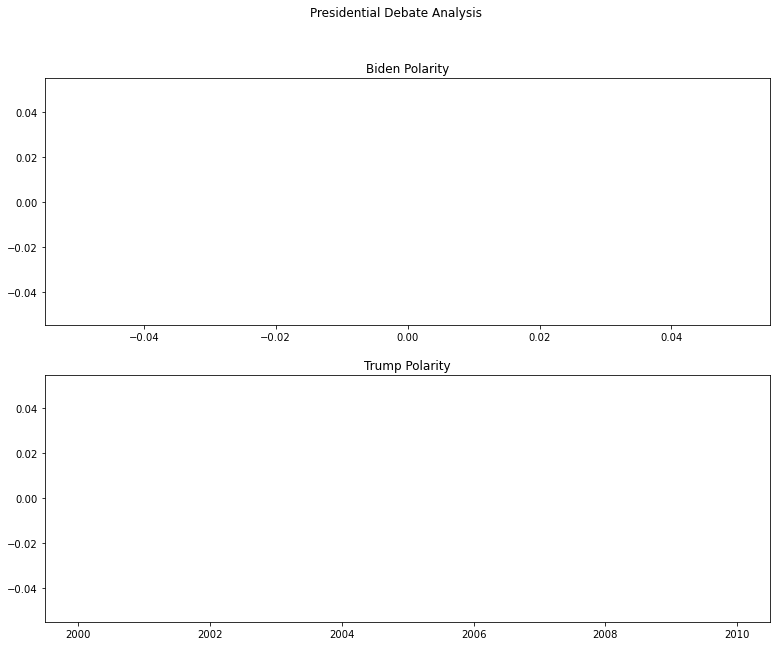

In [52]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()